# load orbital parameters

In [1]:
# Read the ecc_0_500kyr_inter100.txt under /data_fig3

import pandas as pd

path='D:/VScode/Paleoclimate_causality/data/'
df_ecc=pd.read_csv(path+'ecc_0_500kyr_inter100.txt', sep='\s+', header=None)
df_ecc.columns=['age', 'ecc']
df_ecc['age']=-1*df_ecc['age']*1000
df_ecc=df_ecc.iloc[::-1]
df_ecc.to_csv(path+'df_ecc.csv', index=False)

df_ecc

,age,ecc
5000,-0.0,0.016702
4999,100.0,0.016750
4998,200.0,0.016797
4997,300.0,0.016845
4996,400.0,0.016892
...,...,...
4,499600.0,0.033901
3,499700.0,0.033871
2,499800.0,0.033841
1,499900.0,0.033812


In [2]:
# Read the ecc_0_500kyr_inter100.txt under /data_fig3

import pandas as pd

path='D:/VScode/Paleoclimate_causality/data/'
df_obl=pd.read_csv(path+'obliquity_0_500kyr_inter100.txt', sep='\s+', header=None)
df_obl.columns=['age', 'obl']
df_obl['age']=-1*df_obl['age']*1000
df_obl=df_obl.iloc[::-1]
df_obl.to_csv(path+'df_obl.csv', index=False)

df_obl

,age,obl
5000,-0.0,0.409093
4999,100.0,0.409320
4998,200.0,0.409547
4997,300.0,0.409773
4996,400.0,0.410000
...,...,...
4,499600.0,0.414205
3,499700.0,0.414106
2,499800.0,0.414005
1,499900.0,0.413902


In [3]:
# Read the pre_0_500kyr_inter100.txt under /data_fig3

import pandas as pd

path='D:/VScode/Paleoclimate_causality/data/'
df_pre=pd.read_csv(path+'pre_0_500kyr_inter100.txt', sep='\s+', header=None)
df_pre.columns=['age', 'pre']
df_pre['age']=-1*df_pre['age']*1000
df_pre=df_pre.iloc[::-1]
df_pre.to_csv(path+'df_pre.csv', index=False)

df_pre

,age,pre
5000,-0.0,0.016280
4999,100.0,0.016431
4998,200.0,0.016568
4997,300.0,0.016690
4996,400.0,0.016798
...,...,...
4,499600.0,0.012835
3,499700.0,0.011893
2,499800.0,0.010943
1,499900.0,0.009986


# Load NGRIP D18O

In [6]:
import pandas as pd
import numpy as np

df_ngrip = pd.read_csv('data/GICC05modelext_for_NGRIP.txt', sep='\t', skiprows=70, encoding='ISO-8859-1',names=['age','depth','d18o','age_error'], usecols=['age','depth','d18o','age_error'])
# drop the column depth and age_error
df_ngrip = df_ngrip.drop(['depth','age_error'], axis=1)

df_ngrip.set_index('age', inplace=True)

# interpolate the data

# Create a new index with 100-year resolution
new_index = np.arange(100, df_ngrip.index.max() + 100, 100)
# Reindex the DataFrame with the new index, interpolating the missing values
df_ngrip_interp = df_ngrip.reindex(new_index).interpolate(method='index').reset_index()

# Rename the column 'index' back to 'age'
df_ngrip_interp.rename(columns={'index': 'age'}, inplace=True)

df_ngrip_interp.to_csv('data/GT_120kyr.csv', index=False)

df_ngrip_interp

,age,d18o
0,100,-34.53
1,200,-35.16
2,300,-35.36
3,400,-35.35
4,500,-34.93
...,...,...
1218,121900,-32.41
1219,122000,-32.55
1220,122100,-32.48
1221,122200,-32.85


# Read AT data

In [8]:
import pandas as pd
import numpy as np

# read the txt file
df_AT = pd.read_csv('data/edc3deuttemp2007.txt', encoding='ISO-8859-1', skiprows=91, 
                    delim_whitespace=True)

df_AT.columns = ['bag', 'ztop', 'age', 'dD', 'temperature']
# Delete the 'bag', 'ztop', 'dD' columns
df_AT = df_AT.drop(columns=['bag', 'ztop', 'dD'])

# Convert 'age' and 'temperature' columns to numeric, coerce errors to NaN
df_AT = df_AT.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values that resulted from conversion errors
df_AT = df_AT.dropna(subset=['age', 'temperature'])

# Create a new index with 100-year resolution
new_index = np.arange(100, df_AT['age'].max() + 100, 100)

# Convert the DataFrame to a NumPy array for interpolation
age_array = df_AT['age'].to_numpy()
temp_array = df_AT['temperature'].to_numpy()

# Create an array to hold the interpolated temperatures
interpolated_temps = np.interp(new_index, age_array, temp_array)

# Create a new DataFrame from the interpolated data
df_AT_interp = pd.DataFrame({
    'age': new_index,
    'temperature': interpolated_temps
})

# save csv file
df_AT_interp.to_csv('data/edc_AT.csv', index=False)

# Display the interpolated DataFrame
df_AT_interp


,age,temperature
0,100.0,-0.516079
1,200.0,0.196428
2,300.0,0.115777
3,400.0,-0.332781
4,500.0,-1.688654
...,...,...
8012,801300.0,-8.853737
8013,801400.0,-8.844418
8014,801500.0,-8.835098
8015,801600.0,-8.825778


# Load all data

In [9]:
import pandas as pd

# load orbital parameters
path='D:/VScode/Paleoclimate_causality/data/'
# df_ecc=pd.read_csv(path+'df_ecc.csv')
df_pre=pd.read_csv(path+'df_pre.csv')
df_obl=pd.read_csv(path+'df_obl.csv')
df_ngrip_interp=pd.read_csv(path+'GT_120kyr.csv')
df_AT_interp=pd.read_csv(path+'edc_AT.csv')


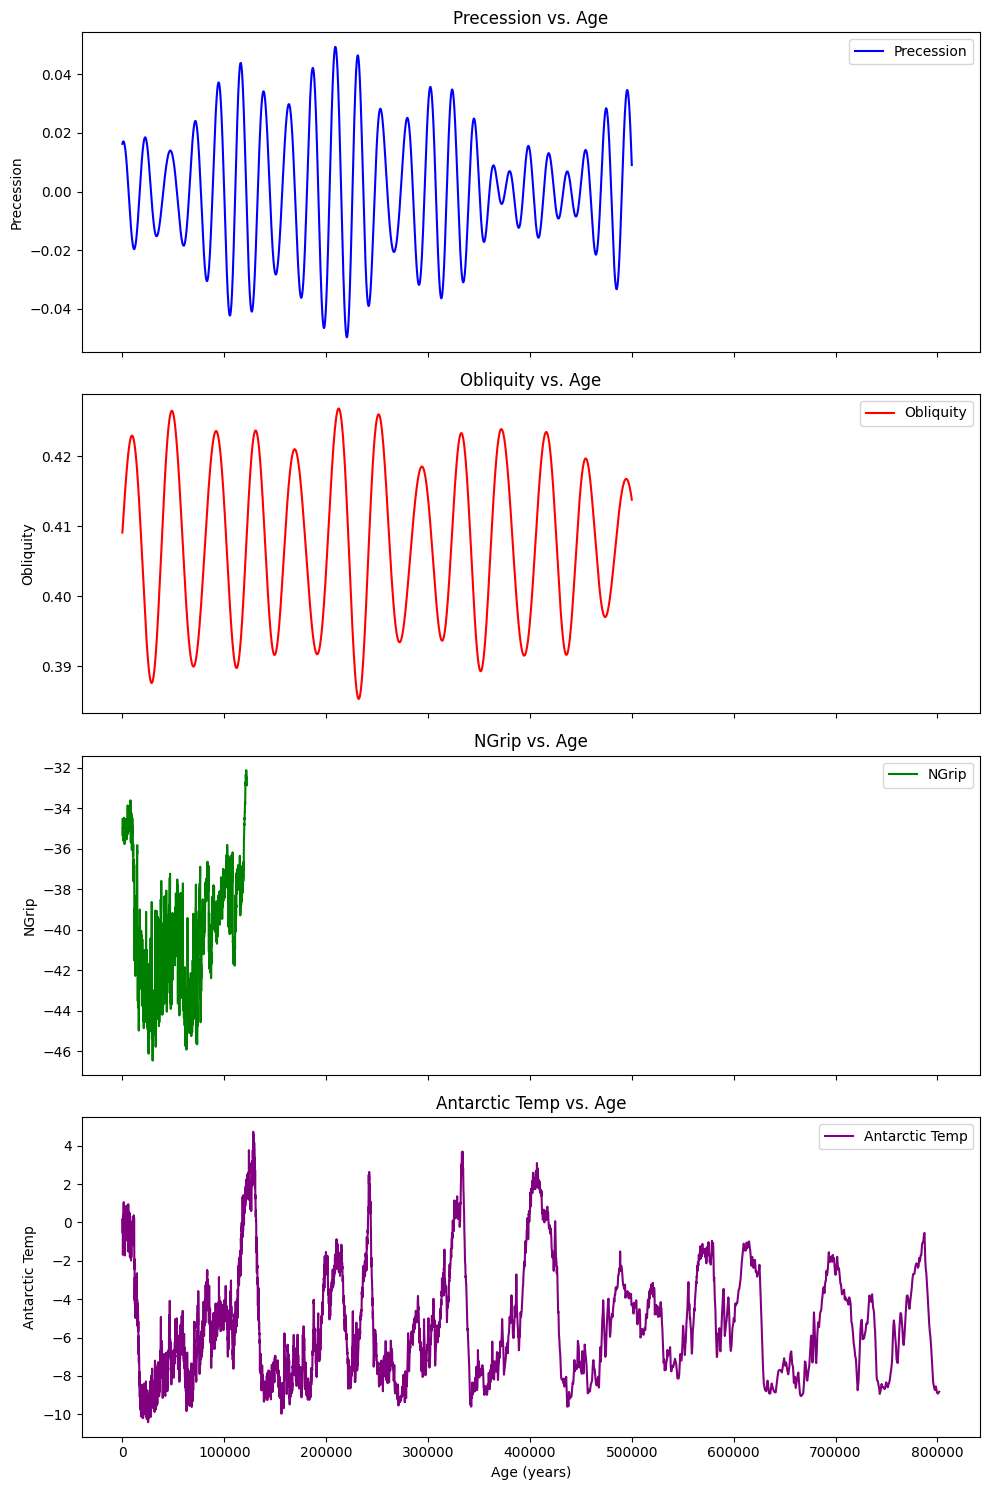

In [16]:
import matplotlib.pyplot as plt


# Plotting the data using subplots in one column
fig, axs = plt.subplots(4, 1, figsize=(10, 15), sharex=True)

# Plot precession data
axs[0].plot(df_pre['age'], df_pre['pre'], label='Precession', color='blue')
axs[0].set_title('Precession vs. Age')
axs[0].set_ylabel('Precession')
axs[0].legend()

# Plot obliquity data
axs[1].plot(df_obl['age'], df_obl['obl'], label='Obliquity', color='red')
axs[1].set_title('Obliquity vs. Age')
axs[1].set_ylabel('Obliquity')
axs[1].legend()

# Plot NGrip interpolated data
axs[2].plot(df_ngrip_interp['age'], df_ngrip_interp['d18o'], label='NGrip', color='green')
axs[2].set_title('NGrip vs. Age')
axs[2].set_ylabel('NGrip')
axs[2].legend()

# Plot Antarctic temperature interpolated data
axs[3].plot(df_AT_interp['age'], df_AT_interp['temperature'], label='Antarctic Temp', color='purple')
axs[3].set_title('Antarctic Temp vs. Age')
axs[3].set_xlabel('Age (years)')
axs[3].set_ylabel('Antarctic Temp')
axs[3].legend()

# Display the plot
plt.tight_layout()
plt.show()


# Crop data

In [55]:
df_ngrip_interp_crop = df_ngrip_interp[(df_ngrip_interp['age'] >= 1000) & (df_ngrip_interp['age'] <= 100000)].reset_index(drop=True)
df_pre_crop = df_pre[(df_pre['age'] >= 1000) & (df_pre['age'] <=100000)].reset_index(drop=True)
df_pre_crop.iloc[:, 1] = df_pre_crop.iloc[:, 1] * -1
df_obl_crop = df_obl[(df_obl['age'] >= 1000) & (df_obl['age'] <= 100000)].reset_index(drop=True)
df_AT_interp_crop = df_AT_interp[(df_AT_interp['age'] >= 1000) & (df_AT_interp['age'] <= 100000)].reset_index(drop=True)


In [17]:
df_ngrip_interp_crop = df_ngrip_interp[(df_ngrip_interp['age'] >= 1000) & (df_ngrip_interp['age'] <= 23000)].reset_index(drop=True)
df_pre_crop = df_pre[(df_pre['age'] >= 1000) & (df_pre['age'] <=23000)].reset_index(drop=True)
df_pre_crop.iloc[:, 1] = df_pre_crop.iloc[:, 1] * -1
df_obl_crop = df_obl[(df_obl['age'] >= 1000) & (df_obl['age'] <= 23000)].reset_index(drop=True)
df_AT_interp_crop = df_AT_interp[(df_AT_interp['age'] >= 1000) & (df_AT_interp['age'] <= 23000)].reset_index(drop=True)

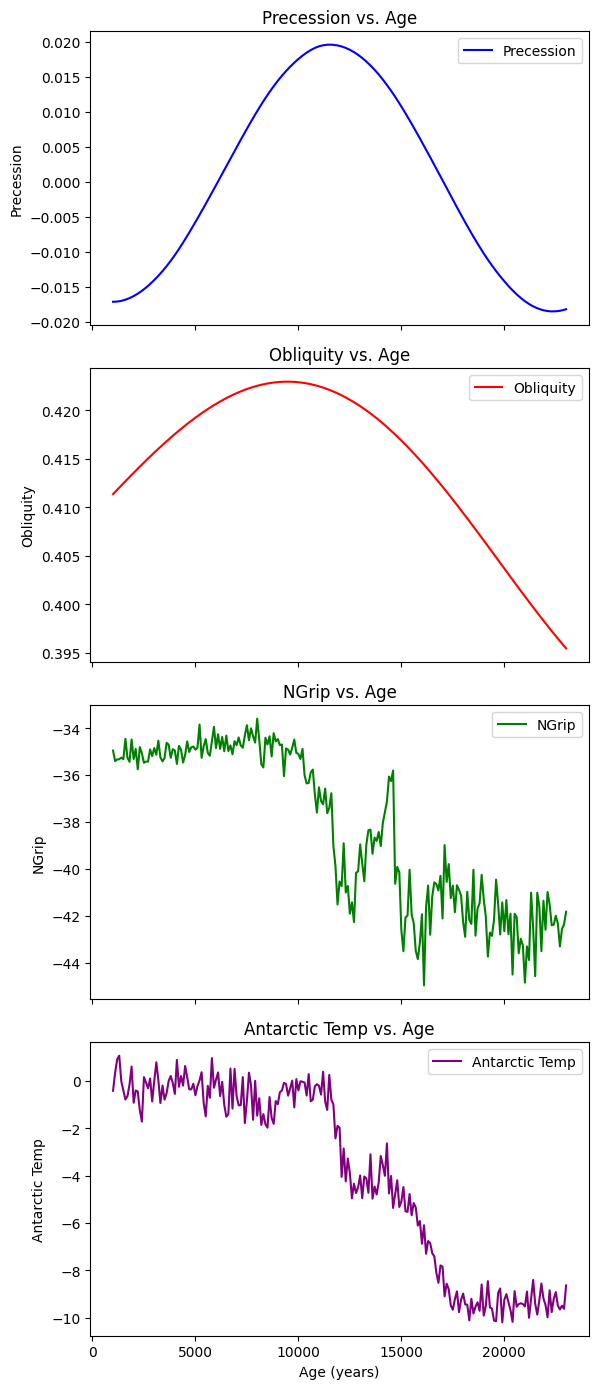

In [18]:
import matplotlib.pyplot as plt


# Plotting the data using subplots in one column
fig, axs = plt.subplots(4, 1, figsize=(6, 14), sharex=True)

# Plot precession data
axs[0].plot(df_pre_crop['age'], df_pre_crop['pre'], label='Precession', color='blue')
axs[0].set_title('Precession vs. Age')
axs[0].set_ylabel('Precession')
axs[0].legend()

# Plot obliquity data
axs[1].plot(df_obl_crop['age'], df_obl_crop['obl'], label='Obliquity', color='red')
axs[1].set_title('Obliquity vs. Age')
axs[1].set_ylabel('Obliquity')
axs[1].legend()

# Plot NGrip interpolated data
axs[2].plot(df_ngrip_interp_crop['age'], df_ngrip_interp_crop['d18o'], label='NGrip', color='green')
axs[2].set_title('NGrip vs. Age')
axs[2].set_ylabel('NGrip')
axs[2].legend()

# Plot Antarctic temperature interpolated data
axs[3].plot(df_AT_interp_crop['age'], df_AT_interp_crop['temperature'], label='Antarctic Temp', color='purple')
axs[3].set_title('Antarctic Temp vs. Age')
axs[3].set_xlabel('Age (years)')
axs[3].set_ylabel('Antarctic Temp')
axs[3].legend()


# Display the plot
plt.tight_layout()
plt.show()


In [17]:
combined_data = pd.DataFrame({
    'pre': df_pre_crop.iloc[:, 1],
    'obl': df_obl_crop.iloc[:, 1],
    'ngrip': df_ngrip_interp_crop.iloc[:, 1]
})

combined_data.reset_index(drop=True, inplace=True)  # Reset the index if needed
combined_data

,pre,obl,ngrip
0,-0.017116,0.411353,-34.96
1,-0.017109,0.411577,-35.41
2,-0.017085,0.411800,-35.34
3,-0.017045,0.412022,-35.33
4,-0.016988,0.412244,-35.26
...,...,...,...
986,-0.003828,0.413978,-37.52
987,-0.002715,0.413743,-38.37
988,-0.001597,0.413506,-38.00
989,-0.000475,0.413267,-37.36


In [19]:
from scipy.stats import zscore

combined_data = pd.DataFrame({
    'pre': zscore(df_pre_crop.iloc[:, 1]),
    'obl': zscore(df_obl_crop.iloc[:, 1]),
    'temperature': zscore(df_AT_interp_crop.iloc[:, 1])
})

combined_data.reset_index(drop=True, inplace=True)  # Reset the index if needed
combined_data

,pre,obl,temperature
0,-1.284988,-0.434130,0.905813
1,-1.284468,-0.405692,1.102236
2,-1.282686,-0.377381,1.246981
3,-1.279714,-0.349198,1.287086
4,-1.275480,-0.321014,1.009059
...,...,...,...
216,-1.384084,-2.326884,-1.427424
217,-1.380815,-2.359511,-1.470359
218,-1.376433,-2.391757,-1.428354
219,-1.370936,-2.423623,-1.462018


ADF Statistic: -3.722774
p-value: 0.003804
Critical Values:
	1%: -3.462
	5%: -2.876
	10%: -2.574
Data is stationary.


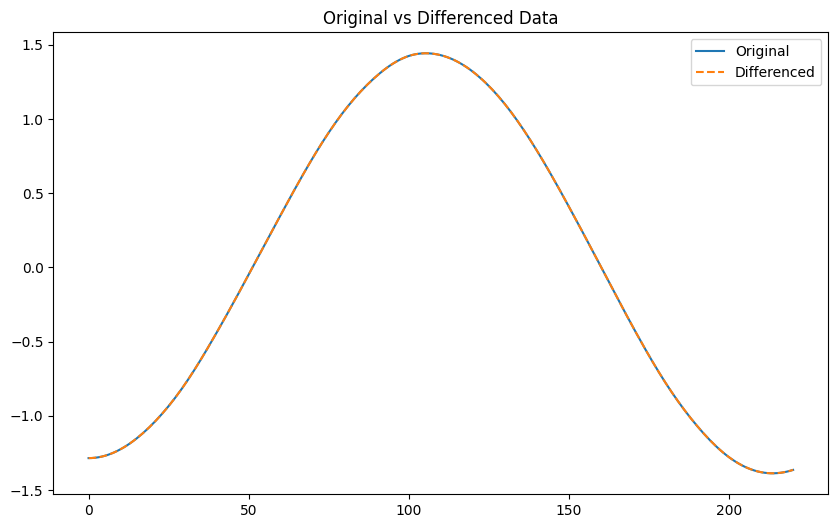

ADF Statistic: -2.874353
p-value: 0.048413
Critical Values:
	1%: -3.462
	5%: -2.875
	10%: -2.574
Data is stationary.


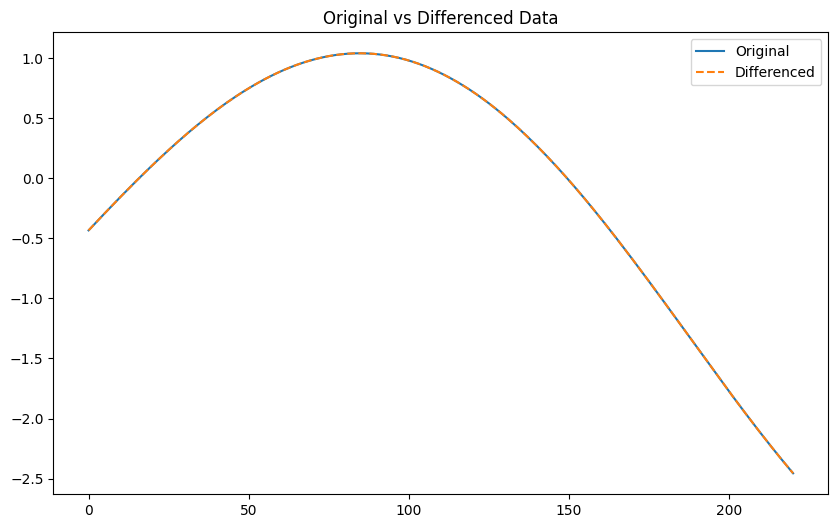

ADF Statistic: -0.444407
p-value: 0.902416
Critical Values:
	1%: -3.461
	5%: -2.875
	10%: -2.574
Data is not stationary. Differencing the data...


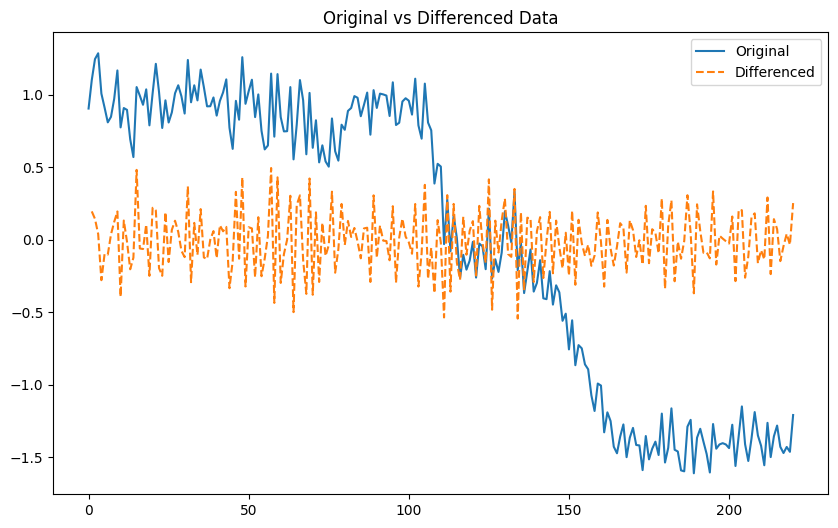

In [28]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

checked_pre = GC.check_and_difference(combined_data, 'pre', plot=True)
checked_obl = GC.check_and_difference(combined_data, 'obl', plot=True)
checked_temp = GC.check_and_difference(combined_data, 'temperature', plot=True)

In [24]:
import importlib
from toolbox import GC_functions as GC
importlib.reload(GC)

pre_AT_GC_test=GC.gc_test(combined_data, 'pre', 'temperature', 50)
obl_AT_GC_test=GC.gc_test(combined_data, 'obl', 'temperature', 50)

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
pre => temperature    476.785               0.000                1                True
temperature => pre    1.956               0.005                50                True

Granger Causality Test
------------------------------------------------------------
Direction                   F-statistics         p-value         lag         Granger cause
obl => temperature    993.373               0.000                1                True
temperature => obl    7.590               0.001                2                True

